# EDA Mortalidade

Nessa segunda metade, foi realizada uma Análise Exploratória de Dados (EDA) com os dados abertos do SUS sobre mortalidade na região Centro-Oeste do Brasil. O objetivo foi explorar padrões e tendências nas taxas de mortalidade, considerando variáveis como idade, sexo e causas de morte. A análise envolveu tratamento restante de algumas variáveis, bem como visualizações e estatísticas descritivas para identificar possíveis correlações e variações temporais e geográficas. Embora os resultados ainda exijam maior aprofundamento, a análise indicou tendências relevantes, como o excesso de mortes por Infarto Cardiaco e AVC. Este trabalho fornece uma base para futuras análises mais detalhadas e o aprimoramento de políticas públicas na área da saúde.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mort_cw = pd.read_parquet('mort_center-west_br.parquet.gzip')
mort_cw.head()

,dtobito,idade,sexo,racacor,estciv,esc,ocup,lococor,codmunocor,assistmed,causabas,circobito,termocbo2002,codigoibge,nome,latitude,longitude
0,2003-07-13,45,Masculino,Ignorado,Ignorado,Ignorado,02100,Hospital,2704302,Ignorado,W699,Acidente,Código Inválido,2704302,Maceió,-9.66599,-35.7350
1,2003-01-08,83,Feminino,Branca,Viúvo,Ignorado,00800,Hospital,2903904,Ignorado,I219,Ignorado,Código Inválido,2903904,Bom Jesus da Lapa,-13.25060,-43.4108
2,2003-02-28,49,Feminino,Branca,Casado,8 a 11 anos,31000,Via pública,2909307,Ignorado,V499,Ignorado,Código Inválido,2909307,Correntina,-13.34770,-44.6333
3,2003-01-26,60,Feminino,Ignorado,Casado,Ignorado,14000,Via pública,2933307,Ignorado,R98,Ignorado,Código Inválido,2933307,Vitória da Conquista,-14.86150,-40.8442
4,2003-02-09,4,Masculino,Branca,Ignorado,Ignorado,,Via pública,2933307,Ignorado,V892,Acidente,Código Inválido,2933307,Vitória da Conquista,-14.86150,-40.8442


In [3]:
mort_cw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702162 entries, 0 to 1702161
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   dtobito       datetime64[ns]
 1   idade         Int16         
 2   sexo          category      
 3   racacor       category      
 4   estciv        category      
 5   esc           category      
 6   ocup          category      
 7   lococor       category      
 8   codmunocor    object        
 9   assistmed     category      
 10  causabas      category      
 11  circobito     category      
 12  termocbo2002  object        
 13  codigoibge    object        
 14  nome          object        
 15  latitude      float64       
 16  longitude     float64       
dtypes: Int16(1), category(9), datetime64[ns](1), float64(2), object(4)
memory usage: 113.9+ MB


In [4]:
mort_cw.describe()

,dtobito,idade,latitude,longitude
count,1701645,1702162.0,1.702162e+06,1.702162e+06
mean,2014-09-12 06:57:41.887291904,60.186871,-1.690402e+01,-5.140283e+01
min,2003-01-01 00:00:00,0.0,-3.203490e+01,-7.267560e+01
25%,2009-09-20 00:00:00,47.0,-1.779230e+01,-5.462950e+01
50%,2015-04-09 00:00:00,65.0,-1.646730e+01,-4.926430e+01
75%,2020-03-17 00:00:00,78.0,-1.577950e+01,-4.895300e+01
max,2023-12-31 00:00:00,123.0,4.479900e+00,-3.483030e+01
std,NaN,23.834963,2.528239e+00,3.381774e+00


<Axes: ylabel='idade'>

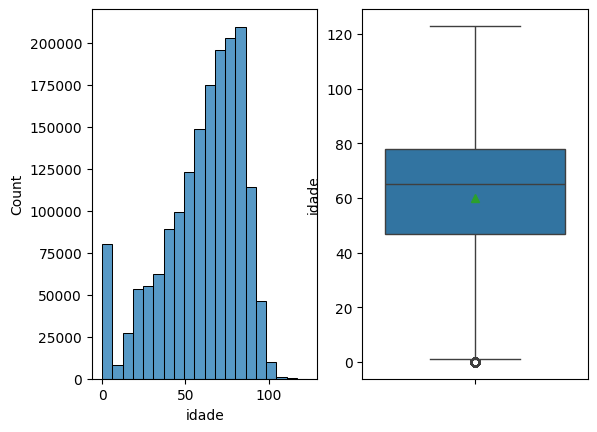

In [5]:
fig, ax = plt.subplots(1, 2)

sns.histplot(mort_cw["idade"], bins= 20, ax= ax[0])
sns.boxplot(mort_cw["idade"], ax= ax[1], showmeans= True)

Ou a mortalidade de recém nascidos é muito alta ou há algo incoerênte no registro do código de idade.


Talvez a população de bebês deva ser investigada de forma isolada.

In [6]:
# Remoção de outliers
iqr = mort_cw["idade"].quantile(0.75) - mort_cw["idade"].quantile(0.25)
lower_bound = mort_cw["idade"].quantile(0.25) - 1.5 * iqr
upper_bound = mort_cw["idade"].quantile(0.75) + 1.5 * iqr

mort_cw = mort_cw[(mort_cw["idade"] >= lower_bound) & (mort_cw["idade"] <= upper_bound)]

# Remoção de idades estranhamente altas
mort_cw = mort_cw[mort_cw["idade"] <= 116]

<Axes: ylabel='idade'>

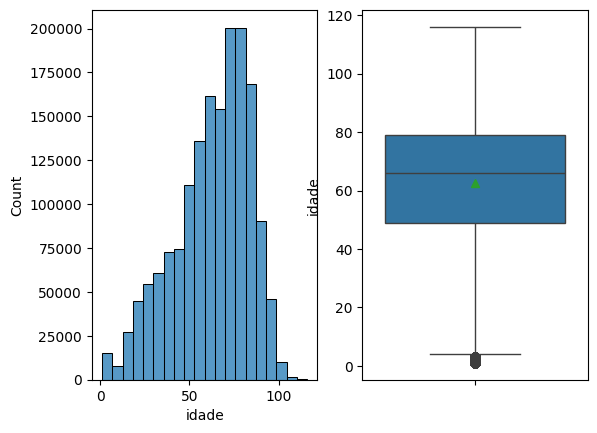

In [7]:
fig, ax = plt.subplots(1, 2)

sns.histplot(mort_cw["idade"], bins= 20, ax= ax[0])
sns.boxplot(mort_cw["idade"], ax= ax[1], showmeans= True)

A distrubuição das idades ainda está distorcida para a direita, mas apresenta agora um formato mais similar a uma distribuição normal.

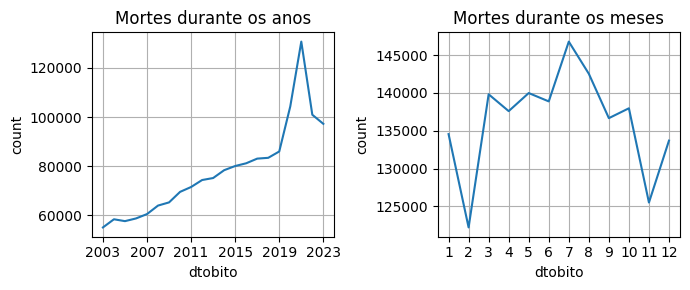

In [8]:
fig, ax = plt.subplots(1, 2, figsize= (7, 3))

sns.lineplot(mort_cw["dtobito"].dt.year.value_counts(), ax = ax[0])
ax[0].set_xticks([i for i in range(2003, 2024, 4)])
ax[0].grid()
ax[0].set_title("Mortes durante os anos")

sns.lineplot(mort_cw["dtobito"].dt.month.value_counts(), ax = ax[1])
ax[1].set_xticks([i for i in range(1, 13)])
ax[1].grid()
ax[1].set_title("Mortes durante os meses")

fig.tight_layout()
plt.show()

Provavelmente as quantidade de mortes parece ser mais baixa nos anos iniciais, devido a falta de registro das mortes no sistema do SUS. No entanto, é possível identificar o pico de mortes entre 2019 e 2022 devido ao efeito do vívus COVID-19. Quanto aos meses, é destacado um salto da quantidade de mortes na metade do ano.

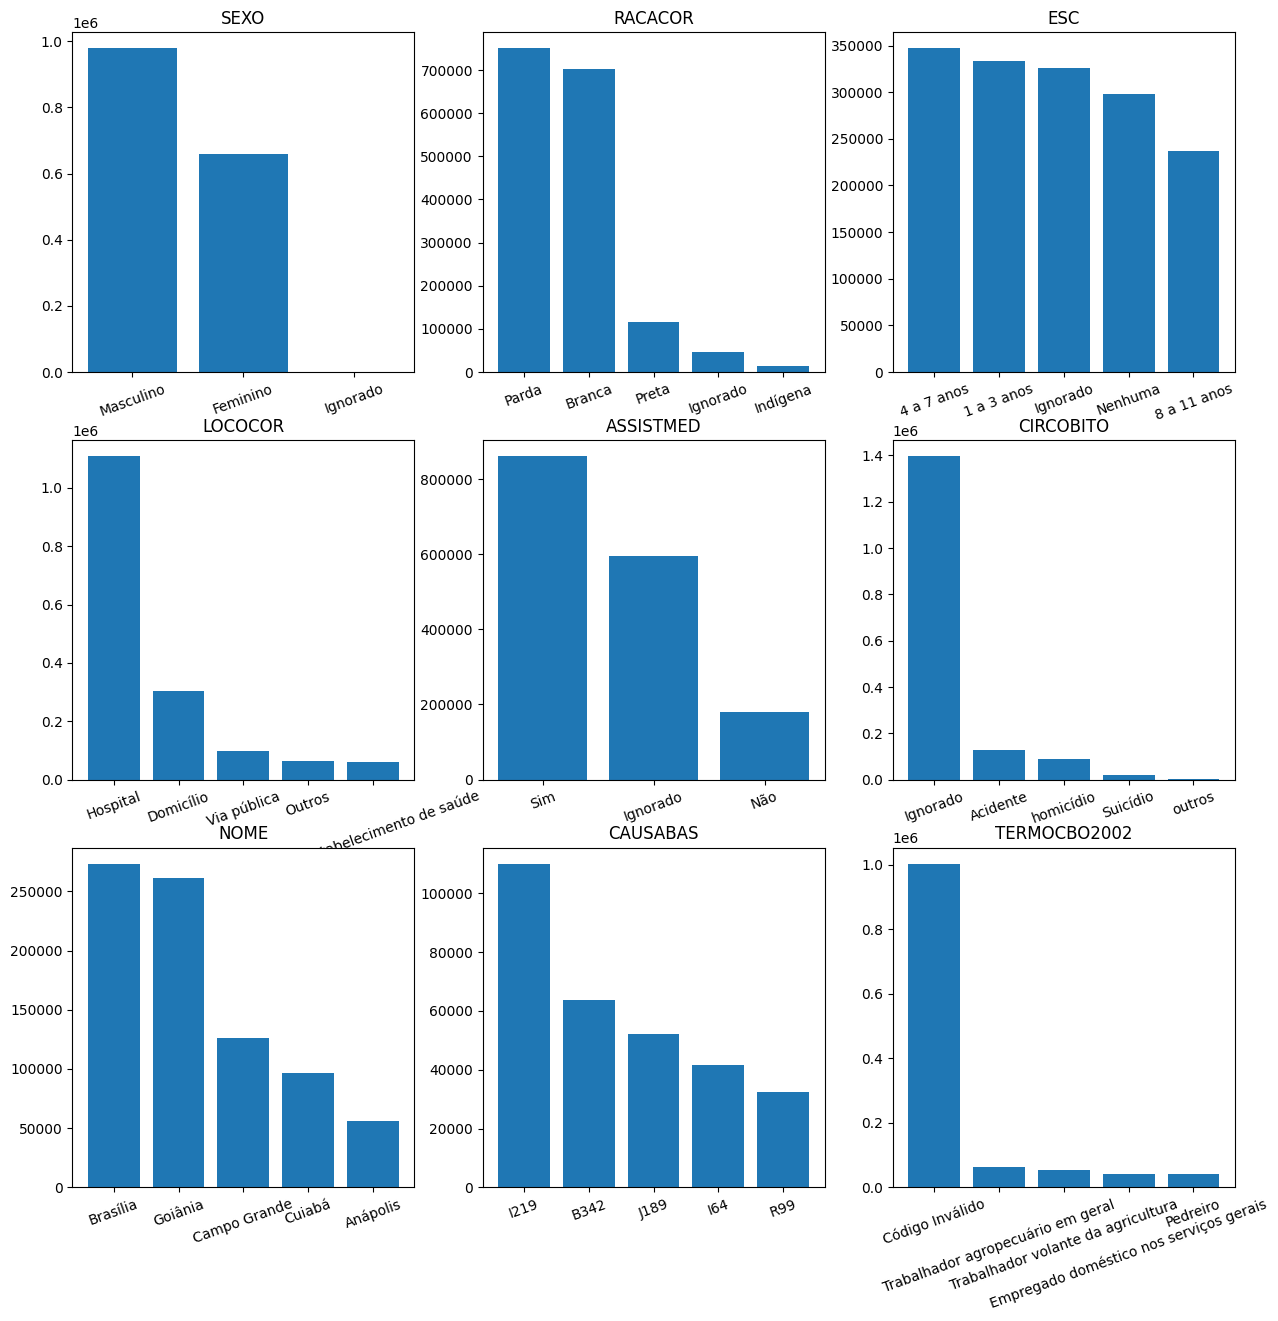

In [9]:
cat_columns = ["sexo", "racacor", "esc",
               "lococor", "assistmed", "circobito",
               "nome", "causabas", "termocbo2002"]

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
      data = mort_cw[cat_columns[i*3+j]].value_counts().head()
      ax[i, j].bar(data.index, data.values)
      ax[i, j].set_title(cat_columns[i*3+j].upper())
      ax[i, j].xaxis.set_tick_params(rotation=20)

plt.show()

Segue uma legenda para as doenças mais frequêntes no sistema público de saúde:
* I219 - Infarto agudo do miocárdio não especificado.
* B342 - Infecção por coronavírus de localização não especificada
* J189 - Pneumonia não especificada
* L64 - Acidente Vascular Cerebral (AVC)
* R99 - Outras causas mal definidas e as não especificadas de mortalidade


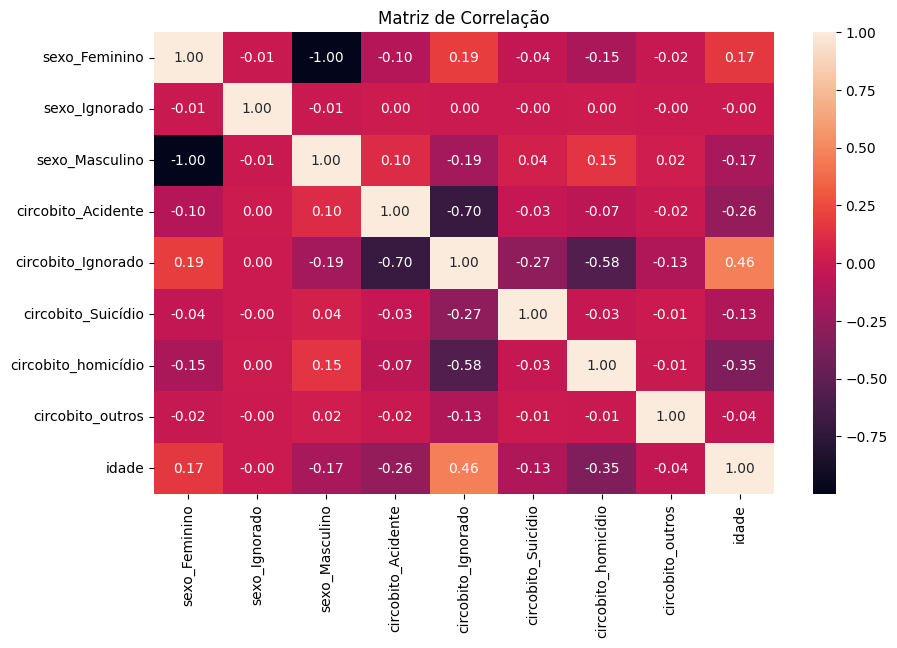

In [10]:
some_dummies = pd.get_dummies(mort_cw[["sexo", "circobito"]])
some_dummies = pd.concat([some_dummies, mort_cw["idade"]], axis=1)

corr_matrix = some_dummies.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

As correlações parecem ser baixas (próximas a zero) em relação a quantidade de dados, mas podem sugerir direções de análise. Por exemplo, ainda qum um correlação positiva fraca (de 0.17 entre 0 à 1) as mulheres tendem a ter uma expectativa maior que a dos homens confore se passa a idade.

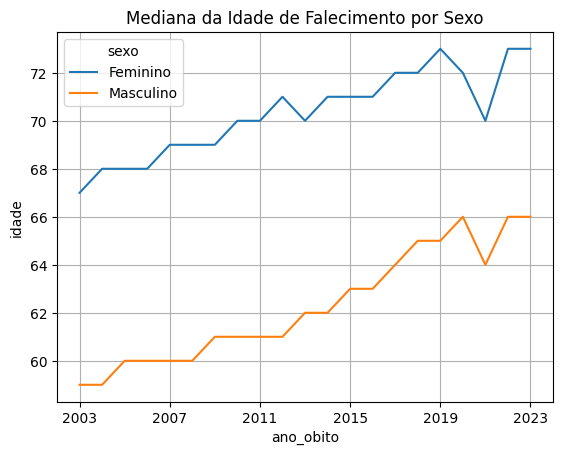

In [11]:
age_sex_mort = mort_cw[["idade", "sexo"]].copy()
age_sex_mort['ano_obito'] = mort_cw['dtobito'].dt.year

age_sex_mort = age_sex_mort[age_sex_mort["sexo"] != "Ignorado"]
age_sex_mort["sexo"] = age_sex_mort["sexo"].astype(str)

age_sex_mort = age_sex_mort.groupby(["ano_obito", "sexo"],
                                    observed=False)[["idade"]].median()

age_sex_mort.reset_index(inplace=True)
sns.lineplot(data= age_sex_mort,
            x= "ano_obito", y= "idade", hue= "sexo")

plt.grid()
plt.xticks([i for i in range(2003, 2024, 4)])
plt.title("Mediana da Idade de Falecimento por Sexo")
plt.show()

Ainda que o gráfico sugira que mulheres tenham maior expectativa de vida, ambos os sexos demonstram uma elevação mediana da idade ao longo dos anos.

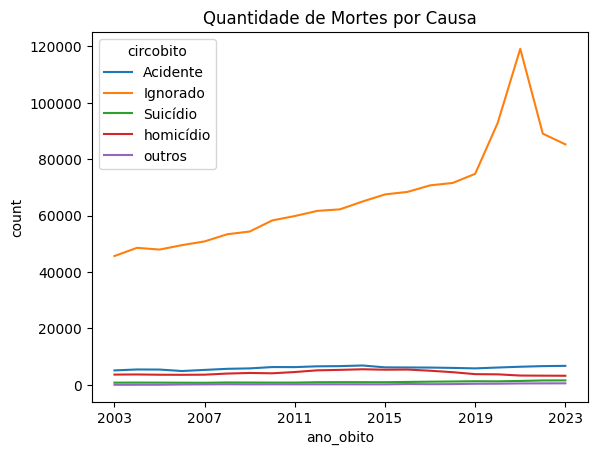

In [12]:
work_cause_mort = mort_cw[["circobito", "termocbo2002"]].copy()
work_cause_mort['ano_obito'] = mort_cw['dtobito'].dt.year

year_cause_count = work_cause_mort.groupby("ano_obito")["circobito"].value_counts().reset_index()

sns.lineplot(data= year_cause_count,
            x= "ano_obito", y= "count", hue= "circobito",)

plt.xticks([i for i in range(2003, 2024, 4)])
plt.title("Quantidade de Mortes por Causa")
plt.show()

A quantidade de categorias definidas como "Ignorado" demonstra um comportamento similar ao total de mortes. Isso pode indicar que tal categoria seja corespondente a morte por doença, e a partir disso demonstra que o atendimento estatal voltado para causas como acidentes ou homicídios talvez seja menos relevante.

In [13]:
def clean_termocbo(x):
  vc_index = x.value_counts().index

  if len(vc_index) == 1:
    return np.nan
  else:
    return vc_index[1]

pivot_work_cause = pd.pivot_table(data= work_cause_mort, index= 'ano_obito',
                                  columns= 'circobito', values= 'termocbo2002',
                                  aggfunc= lambda x: clean_termocbo(x))

pivot_work_cause.tail(5)

<ipython-input-13-04d025ea442c>:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_work_cause = pd.pivot_table(data= work_cause_mort, index= 'ano_obito',


circobito,Acidente,Ignorado,Suicídio,homicídio,outros
ano_obito,,,,,
2019.0,Empregado doméstico nos serviços gerais,Trabalhador volante da agricultura,Empregado doméstico nos serviços gerais,Empregado doméstico nos serviços gerais,Pedreiro
2020.0,Pedreiro,Trabalhador volante da agricultura,Pedreiro,Representante comercial autônomo,Representante comercial autônomo
2021.0,Pedreiro,Representante comercial autônomo,Representante comercial autônomo,Representante comercial autônomo,Representante comercial autônomo
2022.0,Pedreiro,Trabalhador agropecuário em geral,Representante comercial autônomo,Representante comercial autônomo,Pedreiro
2023.0,Empregado doméstico nos serviços gerais,Trabalhador agropecuário em geral,Representante comercial autônomo,Empregado doméstico nos serviços gerais,Empregado doméstico nos serviços gerais


Nos ultimos conco anos o grupo de pessoas mais frágeis com registro definido são: Produtores Rurais quando se trata de Doenças, Pedreiros em caso de Acidentes, seguidos por Profissões Autônomas em casos de Suicídio e Homicídio

In [14]:
mort_cw = mort_cw.rename(columns= {"nome": "municipio"})

In [15]:
deaths_top100_cities = mort_cw["municipio"].value_counts().head(100).reset_index()

cities_coord = mort_cw[["municipio", 'latitude', "longitude"]].drop_duplicates()
cities_coord = pd.DataFrame(cities_coord, columns= ["municipio", 'latitude', "longitude"])

coord_death_counts = pd.merge(deaths_top100_cities, cities_coord,
                              on= "municipio", how= "left")


<Axes: xlabel='longitude', ylabel='latitude'>

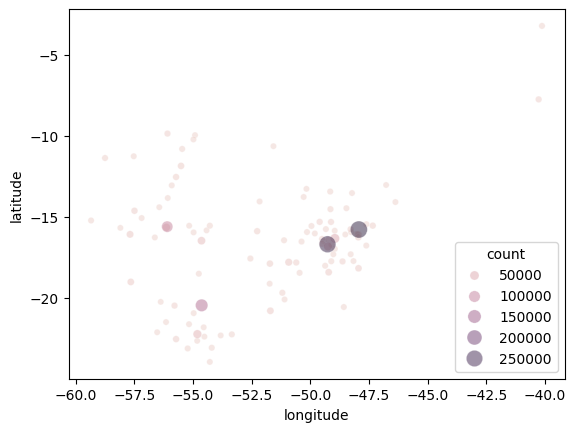

In [16]:
sns.scatterplot(data= coord_death_counts.iloc[::-1], x= "longitude", y= "latitude",
                hue= "count", size= "count", sizes= (20, 150), alpha = 0.5)

A fim de indicar os locais de concentração dos casos registrados, obtemos que as capitais tem destaque. No entanto, seria interessante nas próximas extrações e análises obter também o local de residência, podendo indicar como agrupar regiões por fator de risco e criar investimento coerênte em hospitais especializados para os cidadãos da região centro-oeste.

In [ ]:
mort_cw.to_csv("mortalidade_centro_oeste.csv")